Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
 - output: 
    - p_cores


In [45]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv("dataset/train_data.csv")
df_test = pd.read_csv("dataset/test_data.csv")

In [10]:
x_train = df_train[['input', 'average_runtime']]
y_train = df_train['cores']

x_test = df_test[['input', 'average_runtime']]
y_test = df_test['cores']

In [44]:
learning_rate = 0.001

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(2, activation="relu", dropout=0.2, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="mse",
              metrics='accuracy')

model.summary()

history = model.fit(x_train, y_train, batch_size=1, epochs=100, verbose=2)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2)                 32        
                                                                 
 dense_21 (Dense)            (None, 16)                48        
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
256/256 - 2s - loss: 415.5287 - accuracy: 0.0000e+00 - 2s/epoch - 9ms/step
Epoch 2/100
256/256 - 1s - loss: 294.5599 - accuracy: 0.0000e+00 - 801ms/epoch - 3ms/step
Epoch 3/100
256/256 - 0s - loss: 236.0915 - accuracy: 0.0000e+00 - 460ms/epoch - 2ms/step
Epoch 4/100
25

In [41]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


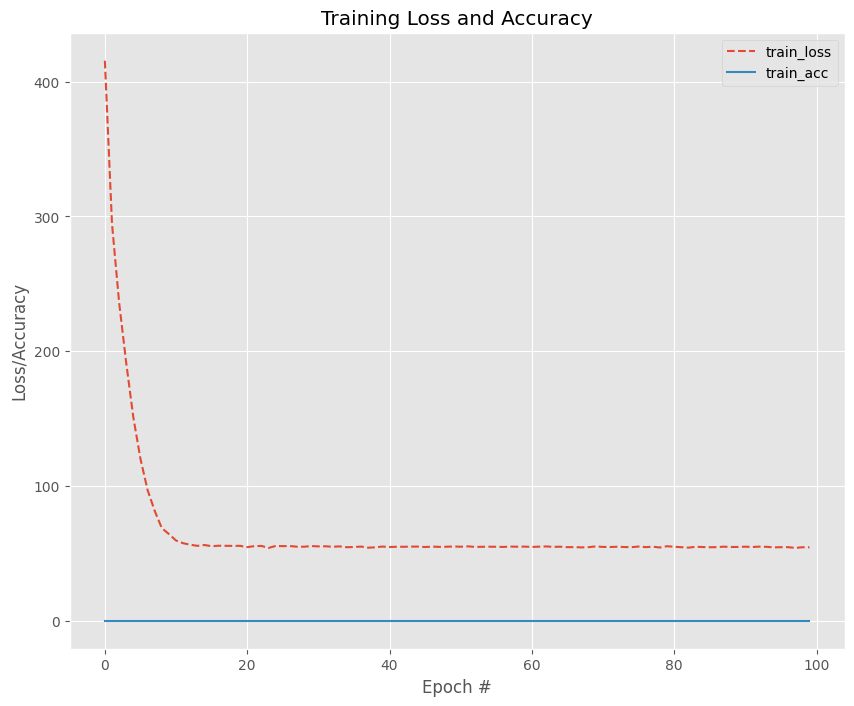

In [49]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(np.arange(0, 100), history.history["loss"], label="train_loss",linestyle='--')
ax.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch #")
ax.set_ylabel("Loss/Accuracy")
ax.legend()
plt.show()